In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_context('paper')

In [2]:
# Read the results of the drift definition analysis
df = pd.read_csv('../../figs/fig_tabular_data/drift_threshold_results_full_domains_adj.csv')
df

,Field Area,Year,Field Area.1,Year.1,Drift Area [% total],Drift Volume [% total],Drift Area [km^2],Drift Volume [m^3],Drift Threshold [% of mean depth],Drift Threshold [m],Mean Depth [m],SD Depth [m],CV Depth,Total Area [km^2],Area Normalized Drift Volume [m^3/km^2]
0,hv,2013,hv,2013,19.20,34.48,3.97,3.911711e+06,130.0,0.71,0.55,0.30,0.55,20.68,189154.303675
1,hv,2015,hv,2015,17.54,26.37,5.00,5.321696e+06,120.0,0.85,0.71,0.25,0.35,28.54,186464.470918
2,hv,2018,hv,2018,20.00,40.71,5.59,5.542494e+06,140.0,0.68,0.49,0.36,0.73,27.95,198300.322004
3,hv,2016,hv,2016,19.40,29.36,5.09,4.034082e+06,120.0,0.63,0.52,0.21,0.41,26.26,153620.792079
4,hv,2017,hv,2017,15.40,30.66,4.29,4.555608e+06,140.0,0.75,0.53,0.32,0.60,27.84,163635.344828
5,hv,2012,hv,2012,23.48,41.23,4.45,3.761374e+06,120.0,0.58,0.48,0.29,0.61,18.95,198489.393140
6,clpx,2018,clpx,2018,20.28,38.20,19.03,2.090393e+07,140.0,0.82,0.58,0.59,1.01,93.84,222761.359761
7,clpx,2016,clpx,2016,20.79,34.24,19.38,1.476127e+07,130.0,0.60,0.46,0.23,0.49,93.23,158331.792342
8,clpx,2013,clpx,2013,16.96,26.24,13.36,1.905929e+07,130.0,0.68,0.53,0.20,0.39,94.75,201153.424526
9,clpx,2017,clpx,2017,18.17,33.07,17.14,1.553812e+07,140.0,0.70,0.50,0.27,0.55,94.29,164790.741330


In [3]:
# Get columns for regression and fix units and formatting
ndf = df.copy()[['Field Area', 'Year', 'Drift Area [km^2]', 'Drift Volume [m^3]']]
ndf['Field Area'] = [i.upper() for i in ndf['Field Area']]
# Convert sq. km to sq m
ndf['Drift Area [$m^2$]'] = ndf['Drift Area [km^2]'] * 10**6
ndf

,Field Area,Year,Drift Area [km^2],Drift Volume [m^3],Drift Area [$m^2$]
0,HV,2013,3.97,3.911711e+06,3970000.0
1,HV,2015,5.00,5.321696e+06,5000000.0
2,HV,2018,5.59,5.542494e+06,5590000.0
3,HV,2016,5.09,4.034082e+06,5090000.0
4,HV,2017,4.29,4.555608e+06,4290000.0
5,HV,2012,4.45,3.761374e+06,4450000.0
6,CLPX,2018,19.03,2.090393e+07,19030000.0
7,CLPX,2016,19.38,1.476127e+07,19380000.0
8,CLPX,2013,13.36,1.905929e+07,13360000.0
9,CLPX,2017,17.14,1.553812e+07,17140000.0


In [4]:
# Get x and y for the linear regression for HV and CLPX
hv_x = ndf.iloc[0:6]['Drift Area [$m^2$]']
print("HV")
print(hv_x)
hv_y = ndf.iloc[0:6]['Drift Volume [m^3]']
print(hv_y)
# Get x and y for the linear regression for HV and CLPX
clpx_x = ndf.iloc[6:]['Drift Area [$m^2$]']
print("CLPX")
print(clpx_x)
clpx_y = ndf.iloc[6:]['Drift Volume [m^3]']
print(clpx_y)


HV
0    3970000.0
1    5000000.0
2    5590000.0
3    5090000.0
4    4290000.0
5    4450000.0
Name: Drift Area [$m^2$], dtype: float64
0    3911711.0
1    5321696.0
2    5542494.0
3    4034082.0
4    4555608.0
5    3761374.0
Name: Drift Volume [m^3], dtype: float64
CLPX
6     19030000.0
7     19380000.0
8     13360000.0
9     17140000.0
10    20590000.0
11    14420000.0
Name: Drift Area [$m^2$], dtype: float64
6     2.090393e+07
7     1.476127e+07
8     1.905929e+07
9     1.553812e+07
10    1.992539e+07
11    1.332210e+07
Name: Drift Volume [m^3], dtype: float64


HV slope: 0.881800    HV Std. Err.: 0.454100


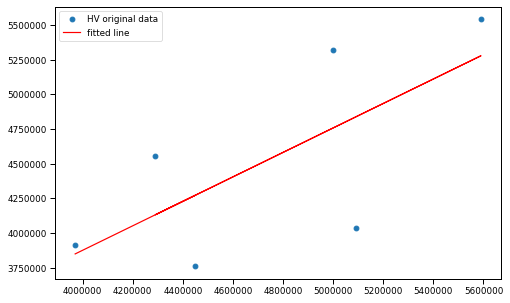

In [16]:
# Calculate Linear Least-Squares Regression for HV
hv_slope, hv_intercept, hv_r_value, hv_p_value, hv_std_err  = stats.linregress(hv_x, hv_y)
hv_slope = hv_slope.round(4)
hv_std_err = hv_std_err.round(4)
print("HV slope: %f    HV Std. Err.: %f" % (hv_slope, hv_std_err))
plt.figure(figsize=(8,5))
plt.plot(hv_x, hv_y, 'o', label='HV original data')
plt.plot(hv_x, hv_intercept + hv_slope * hv_x, 'r', label='fitted line')
plt.legend()
plt.show()

CLPX slope: 0.343100    CLPX Std. Err.: 0.508300


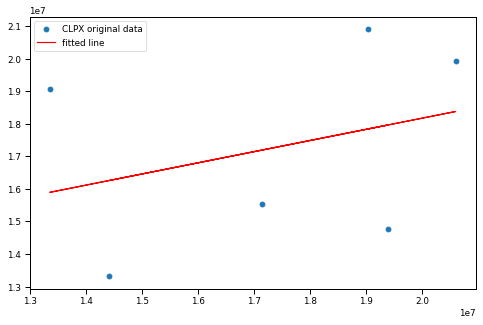

In [17]:
# Calculate Linear Least-Squares Regression for CLPX
clpx_slope, clpx_intercept, clpx_r_value, clpx_p_value, clpx_std_err  = stats.linregress(clpx_x, clpx_y)
clpx_slope = clpx_slope.round(4)
clpx_std_err = clpx_std_err.round(4)
print("CLPX slope: %f    CLPX Std. Err.: %f" % (clpx_slope, clpx_std_err))
plt.figure(figsize=(8,5))
plt.plot(clpx_x, clpx_y, 'o', label='CLPX original data')
plt.plot(clpx_x, clpx_intercept + clpx_slope * clpx_x, 'r', label='fitted line')
plt.legend()
plt.show()

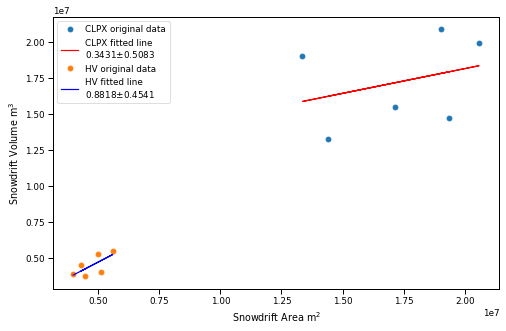

In [23]:
plt.figure(figsize=(8,5))
plt.plot(clpx_x, clpx_y, 'o', label='CLPX original data')
plt.plot(clpx_x, clpx_intercept + clpx_slope * clpx_x, 'r', label='CLPX fitted line \n' + str(clpx_slope) +'$\pm$' + str(clpx_std_err))
plt.plot(hv_x, hv_y, 'o', label='HV original data')
plt.plot(hv_x, hv_intercept + hv_slope * hv_x, 'b', label='HV fitted line \n' + str(hv_slope) +'$\pm$' +str(hv_std_err))

plt.ylabel("Snowdrift Volume m$^3$")
plt.xlabel("Snowdrift Area m$^2$")
plt.legend()
plt.savefig('../../figs/pngs/f8_clpx_hv_drift_area_vol_linregress.png',
            dpi=300, bbox_inches='tight')